# Read and Write Audio Files

### Now that we have had a look at some basic DSP let's move on to some audio processing

The primary analysis of any audio would naturally begin with a sine wave

Sines and cosines form the basic framework behind any analysis of signals we find in nature

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import warnings
%matplotlib inline
# Let's ignore any warnings the code throws up for the time being
warnings.filterwarnings('ignore')


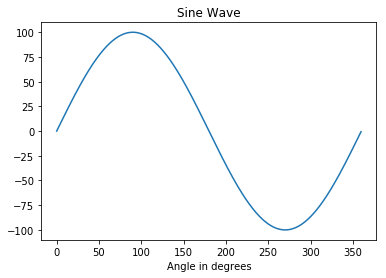

In [6]:
x = (2*np.pi)*np.arange(1000)*(1/1000)
y = 100*np.sin(x)

plt.plot(180*x/np.pi,y)
plt.title("Sine Wave")
plt.xlabel('Angle in degrees')
plt.show()

As seen above we have created a sine wave that extends from 0 to 360 degrees

**Your task :
Create a Sine wave that extends from 0 to an arbitrary length**

In [7]:
# Your code here, the one above should help

## Writing Audio Files

We will now have a look at writing audio files to the system and listening to them
This would help analyze sine waves from a real life perspective

In [8]:
#Function to write a sine wave to your system
wav.write('audio_files/Sine.wav', 44100, y)

Now open your system folder where the iPython notebook was created to find this file and listen to it by opening it with a corresponding pre installed software

The file might be of very small duration

** Your Task : Try using the sound wave you generated in the previous block and see what happens**

Tweak certain parameters to see if you can get your desired response

In [9]:
# Your code here

### The Chirp Signal

Let's look at another signal, that's a chirp   
A chirp is essentially a frequency sweep

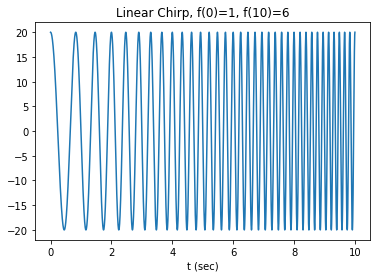

In [10]:
from scipy.signal import chirp

t = np.linspace(0, 10, 10001)
w = 20*chirp(t, f0=1, f1=6, t1=10, method='linear')

plt.plot(t, w)
plt.title("Linear Chirp, f(0)=1, f(10)=6")
plt.xlabel('t (sec)')
plt.show()

In [11]:
#Function to write a sine wave to your system
wav.write('audio_files/Chirp.wav', 44100, w)

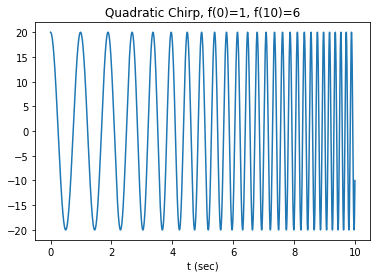

In [12]:
from scipy.signal import chirp

t = np.linspace(0, 10, 10001)
w2 = 20*chirp(t, f0=1, f1=6, t1=10, method='quadratic')

plt.plot(t, w2)
plt.title("Quadratic Chirp, f(0)=1, f(10)=6")
plt.xlabel('t (sec)')
plt.show()

In [13]:
#Function to write a sine wave to your system
wavefilename = 'audio_files/Chirp2.wav'
wav.write(wavefilename, 44100, w2)

Now that we know how to write audio files, lets take a look at how to read and display audio files

The sampling rate of the signal is :  44100


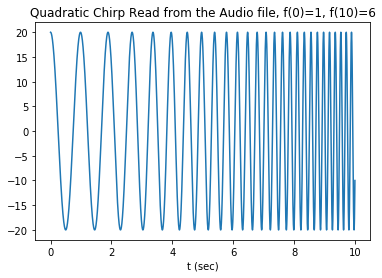

In [14]:
sample_rate, audio = wav.read(wavefilename)

print("The sampling rate of the signal is : ", sample_rate)

plt.plot(t, audio)
plt.title("Quadratic Chirp Read from the Audio file, f(0)=1, f(10)=6")
plt.xlabel('t (sec)')
plt.show()

**Task: Read the demo audio file provided and display the same using matplotlib**

## Dual Tone Multi Frequency (DTMF)  

DTMF forms the basis for our telephone keypads  
DTMF is best explained by the following figure:  

<img src="images/dtmf.png">  

Each number is encoded as a sum of 2 sinusoidal frequencies  

Let's try to generate this! 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

Fs = 8000 # The samping rate, we'll discuss more on this later
row1_freq = 697 # Frequency of the wave for numbers in row1
col1_freq = 1209 # Frequency of the wave for numbers in column 1

col2_freq = 1336

sample = 4000 # Number of samples
x = np.arange(sample)
y1 = 10*np.sin(2 * np.pi * row1_freq * x / Fs)


y2 = 10*np.sin(2 * np.pi * col1_freq * x / Fs)

y4 = 10*np.sin(2 * np.pi * col2_freq * x / Fs)


y3 = y1 + y2
y5 = y1 + y4


pad_wave = np.zeros(sample)

y_final = np.concatenate((y3,pad_wave,y5))

wav.write('audio_files/Tone1',8000,y3)
wav.write('audio_files/Tone2',8000,y5)
wav.write('audio_files/Final_Tone',8000,y_final)

**Your task : Generate a DTMF that corresponds to your telephone/mobile number by extending the code given above!**

## Now that we've got a hang of signals let's move on to some more interesting concepts!

## Sampling
Sample the signal $cos ( 10 \pi t)$ using the following frequencies (a) 100Hz (b) 20 Hz (c) 7.5 Hz (d) 5 Hz (e) 2.5 Hz

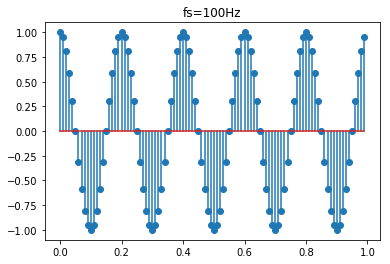

In [16]:
t0 = np.arange(0,1,1/100)
s0 = np.cos(10*np.pi*t0)
plt.stem(t0,s0);
plt.title('fs=100Hz')
plt.show();

## Discrete Fourier Transform

Plot the 8 point DFT of x[n] = {1,1,0,0,0,0,0,1}

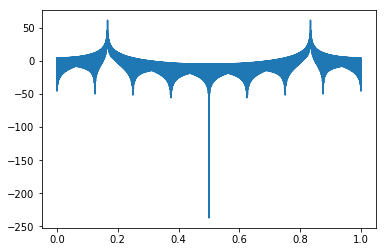

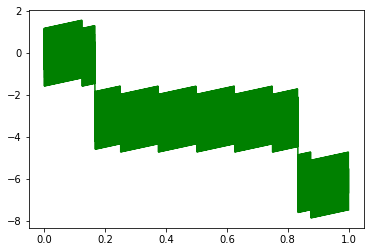

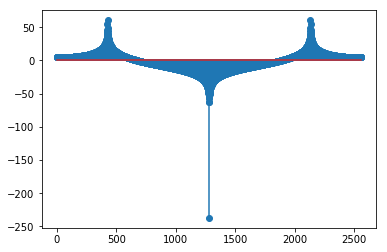

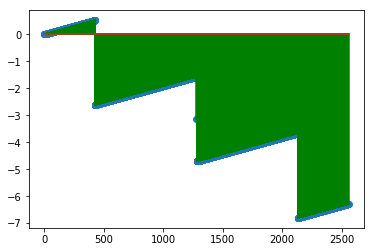

In [21]:
M = 256
k = np.arange(M) #To plot the x axis
a = np.sin(np.pi*2*k/6)#np.array([1,1,0,0,0,0,0,1])

c=np.arange(0, 2*np.pi, 2*np.pi/4096) 
w1,h1 = sig.freqz(a,[1],c)
h1db=20*np.log10(abs(h1))
plt.plot(w1/(2*np.pi),h1db)
plt.show()
angles = np.unwrap(np.angle(h1))
plt.plot(w1/(2*np.pi), angles, 'g')
plt.show()

A = np.fft.fft(a,M) #We're computing 8 point DFT
plt.stem(k,20*np.log10(abs(A))) #To plot the magnitude
plt.show()
angles = np.unwrap(np.angle(A))
plt.stem(k, angles, 'g')#To plot the phase
plt.show()

## Spectrogram

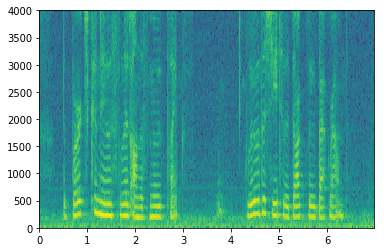

In [28]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile as wav
import numpy as np

sample_rate, samples = wav.read('audio_files/Sine_test.wav')
#frequencies, times, spectrogram = signal.spectrogram(samples[0:sample_rate*7], sample_rate, nfft = 4096)
frequencies, times, spectrogram, im = plt.specgram(samples[0:sample_rate*7], Fs=sample_rate)#, nfft = 4096)

# plt.figure(figsize=(20,5))
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.pcolormesh(times, frequencies, spectrogram, cmap='plasma')